In [1]:
import pandas as pd
from openTSNE import TSNE


In [2]:
import os.path as path

In [3]:
data_train = [
    pd.read_csv(path.join(path.dirname("~/rvqe/notebooks/data/"), f"mnist.train.{d}.csv"), header=None)
    for d in range(0, 10)
]

In [4]:
data_validate = [
    pd.read_csv(path.join(path.dirname("~/rvqe/notebooks/data/"), f"mnist.validate.{d}.csv"), header=None)
    for d in range(0, 10)
]

In [5]:
data_test = [
    pd.read_csv(path.join(path.dirname("~/rvqe/notebooks/data/"), f"mnist.test.{d}.csv"), header=None)
    for d in range(0, 10)
]

In [6]:
def embedding(dim: int):
    tsne = TSNE(
        n_components=dim,
        perplexity=100,
        metric="cosine",
        negative_gradient_method="bh",
        verbose=True,
        n_jobs=3,
        random_state=42,
    )
    
    return tsne.fit(pd.concat(data_train, ignore_index=True).to_numpy())

In [7]:
embeddings = {
    d: embedding(d)
    for d in [2]
}

/home/johannes/miniconda3/envs/rvqe/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


--------------------------------------------------------------------------------
TSNE(callbacks=None, callbacks_every_iters=50, dof=1, early_exaggeration=12,
     early_exaggeration_iter=250, exaggeration=None, final_momentum=0.8,
     initial_momentum=0.5, initialization='pca', ints_in_interval=1,
     learning_rate='auto', max_grad_norm=None, metric='cosine',
     metric_params=None, min_num_intervals=50, n_components=2,
     n_interpolation_points=3, n_iter=500, n_jobs=3,
     negative_gradient_method='bh', neighbors=None, perplexity=100,
     random_state=42, theta=0.5, verbose=True)
--------------------------------------------------------------------------------
===> Finding 300 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 39.08 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 3.05 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.38 seconds
===> Running optimization with exaggeration=12.00

In [65]:
for table_list, tag in [
    (data_train, "train"),
    (data_validate, "validate"),
    (data_test, "test")
]:
    for d, table in enumerate(table_list):
        for dim in embeddings:
            embedding = embeddings[dim]
            embedded_table = pd.DataFrame(
                embedding.transform(table.to_numpy())
            )
            embedded_table.to_csv(
                path.join(path.dirname("~/rvqe/notebooks/data/"), f"mnist.{tag}.{d}.tSNE-{dim}.csv"),
                header=None,
                index=None
            )
        

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.60 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 67195.3654, 50 iterations in 2.2987 sec
Iteration  100, KL divergence 67143.1887, 50 iterations in 2.4547 sec
Iteration  150, KL divergence 67130.5326, 50 iterations in 2.3515 sec
Iteration  200, KL divergence 67125.9478, 50 iterations in 2.2406 sec
Iteration  250, KL divergence 67118.2154, 50 iterations in 2.2671 sec
   --> Time elapsed: 11.61 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.72 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exag

Iteration  150, KL divergence 61732.0696, 50 iterations in 2.2772 sec
Iteration  200, KL divergence 61701.9171, 50 iterations in 2.2900 sec
Iteration  250, KL divergence 61687.4507, 50 iterations in 2.2767 sec
   --> Time elapsed: 12.44 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.53 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 59565.6736, 50 iterations in 5.7168 sec
Iteration  100, KL divergence 59310.1519, 50 iterations in 5.0976 sec
Iteration  150, KL divergence 59196.2099, 50 iterations in 5.4170 sec
Iteration  200, KL divergence 59154.2938, 50 iterations in 5.2532 sec
Iteration  250, KL divergence 59131.0257, 50 iterations in 5.3458 sec
   --> Time elapsed

===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 5119.6932, 50 iterations in 4.4286 sec
Iteration  100, KL divergence 5103.0526, 50 iterations in 4.6177 sec
Iteration  150, KL divergence 5102.9200, 50 iterations in 3.9235 sec
Iteration  200, KL divergence 5102.9202, 50 iterations in 3.9309 sec
Iteration  250, KL divergence 5102.9202, 50 iterations in 3.9112 sec
   --> Time elapsed: 20.81 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.07 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 5128.0500, 50 iterations in 2.2333 sec
Iteration  100, KL divergence 5121.5710, 50 iterations in 2.1124 sec
Iteration  150, 

===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 5328.0238, 50 iterations in 2.2758 sec
Iteration  100, KL divergence 5314.9020, 50 iterations in 2.0992 sec
Iteration  150, KL divergence 5312.7533, 50 iterations in 1.8322 sec
Iteration  200, KL divergence 5312.7523, 50 iterations in 1.8483 sec
Iteration  250, KL divergence 5312.7523, 50 iterations in 1.8296 sec
   --> Time elapsed: 9.89 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.07 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 5152.2461, 50 iterations in 4.5986 sec
Iteration  100, KL divergence 5130.2601, 50 iterations in 3.9196 sec
Iteration  150, K

===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 12147.5757, 50 iterations in 5.0421 sec
Iteration  100, KL divergence 12114.1348, 50 iterations in 4.0916 sec
Iteration  150, KL divergence 12110.9021, 50 iterations in 4.3462 sec
Iteration  200, KL divergence 12106.2953, 50 iterations in 4.0641 sec
Iteration  250, KL divergence 12102.2079, 50 iterations in 4.3167 sec
   --> Time elapsed: 21.86 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.12 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 12055.1184, 50 iterations in 2.2532 sec
Iteration  100, KL divergence 12008.5425, 50 iterations in 1.9794 sec
Iteration

   --> Time elapsed: 0.13 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 11789.2299, 50 iterations in 2.2374 sec
Iteration  100, KL divergence 11743.5261, 50 iterations in 2.3099 sec
Iteration  150, KL divergence 11733.3577, 50 iterations in 1.9023 sec
Iteration  200, KL divergence 11732.9224, 50 iterations in 1.8602 sec
Iteration  250, KL divergence 11728.0688, 50 iterations in 1.8834 sec
   --> Time elapsed: 10.19 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.14 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running 

In [8]:
import matplotlib.pyplot as plt

In [9]:
train_all = pd.concat(data_train, ignore_index=True).to_numpy()

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 1.08 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 68955.2142, 50 iterations in 1.7566 sec
Iteration  100, KL divergence 68918.2036, 50 iterations in 1.7181 sec
Iteration  150, KL divergence 68903.7863, 50 iterations in 1.7820 sec
Iteration  200, KL divergence 68897.9193, 50 iterations in 1.7640 sec
Iteration  250, KL divergence 68892.9872, 50 iterations in 1.7580 sec
   --> Time elapsed: 8.78 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 1.28 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exagg

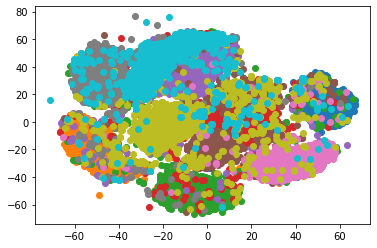

In [10]:
for d in range(10):
    plt.scatter(*zip(*(
            embeddings[2].transform(data_train[d].to_numpy())
        )),
        color=['#1f77b4',
               '#ff7f0e',
               '#2ca02c',
               '#d62728',
               '#9467bd',
               '#8c564b',
               '#e377c2',
               '#7f7f7f',
               '#bcbd22',
               '#17becf'][d]  
       )
plt.show()

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.08 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 5268.4989, 50 iterations in 1.8139 sec
Iteration  100, KL divergence 5260.1644, 50 iterations in 1.7937 sec
Iteration  150, KL divergence 5255.1140, 50 iterations in 1.7629 sec
Iteration  200, KL divergence 5255.1011, 50 iterations in 1.7506 sec
Iteration  250, KL divergence 5255.1011, 50 iterations in 1.7540 sec
   --> Time elapsed: 8.88 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.07 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggerati

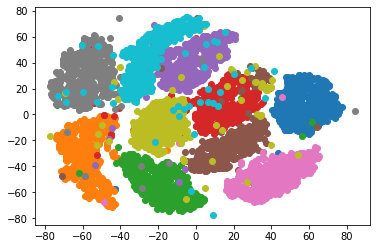

In [62]:
for d in range(10):
    plt.scatter(*zip(*(
            embeddings[2].transform(data_validate[d].to_numpy())
        )),
        color=['#1f77b4',
               '#ff7f0e',
               '#2ca02c',
               '#d62728',
               '#9467bd',
               '#8c564b',
               '#e377c2',
               '#7f7f7f',
               '#bcbd22',
               '#17becf'][d]  
       )
plt.show()

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.12 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 11022.1026, 50 iterations in 1.8223 sec
Iteration  100, KL divergence 11001.1201, 50 iterations in 1.8549 sec
Iteration  150, KL divergence 11000.3193, 50 iterations in 1.8219 sec
Iteration  200, KL divergence 11000.3145, 50 iterations in 1.8120 sec
Iteration  250, KL divergence 11000.3161, 50 iterations in 1.8689 sec
   --> Time elapsed: 9.18 seconds
===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.15 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exagg

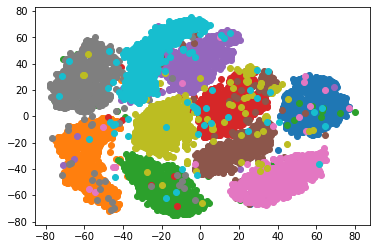

In [63]:
for d in range(10):
    plt.scatter(*zip(*(
            embeddings[2].transform(data_test[d].to_numpy())
        )),
        color=['#1f77b4',
               '#ff7f0e',
               '#2ca02c',
               '#d62728',
               '#9467bd',
               '#8c564b',
               '#e377c2',
               '#7f7f7f',
               '#bcbd22',
               '#17becf'][d]  
       )
plt.show()